## Imports

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os

import seaborn as sns
import matplotlib.pyplot as plt
import sys

import skimage
from skimage.color import rgb2hsv
from skimage.transform import rescale, resize
from tqdm import tqdm

import sys
import os

from sklearn.metrics import classification_report


import bz2, pickle, _pickle as cPickle

import random

# random.seed(1234)

# module_path = os.path.abspath(os.path.join('..'))
# if module_path not in sys.path:
#     sys.path.append(module_path+"/Modules/Testing")
# import testing_module

SAVE_DIR = "../Pickled Datasets/"

COPIES = 2
N_DIGITS = 3
HEIGHT = 25
WIDTH  = 25


PLOT_SAVE = "../Plots/loss-curves/"

def compressed_pickle(name: str, data):
    with bz2.BZ2File(os.path.join(SAVE_DIR, "{}.pbz2".format(name)), 'w') as f:
        cPickle.dump(data, f)

def decompress_pickle(file):
    data = bz2.BZ2File(file, 'rb')
    data = cPickle.load(data)
    return data

def plot_history(history):
    acc=history.history['accuracy']
    val_acc=history.history['val_accuracy']
    loss=history.history['loss']
    val_loss=history.history['val_loss']
    epochs=range(len(acc))

    fig, ax = plt.subplots(1, 2, figsize = (12, 6))
    ax[0].plot(epochs, acc, 'r', label = "Training Accuracy")
    ax[0].plot(epochs, val_acc, 'b', label = "Validation Accuracy")
    ax[0].legend()
    ax[0].set_title('Training and Validation Accuracy')
    ax[0].set_xlabel("Epochs")
    
    ax[1].plot(epochs, loss, 'r', label = "Training Loss")
    ax[1].plot(epochs, val_loss, 'b', label = "Validation Loss")
    ax[1].set_title('Training and Validation Losses')
    ax[1].set_xlabel("Epochs")
    plt.show()

    return (fig, ax)


SKImage rescales the image for us! Which means that we don't need to rescale by 255.0 anymore, saving us needlessly spent time and effort. There is another Augmentor library which can be used for data augmentation. We can simply sample the augmented images henceforth!

## Preliminary setup

In [2]:
# sys.path.append(os.path.dirname(os.path.join((os.path.pardir), "Modules")))

# origin_dir = os.path.join(os.path.pardir, 'Data')
# new_dir_path = os.path.join(os.path.pardir, 'Data', 'cell_images')

# #for local systems
# train_csv = os.path.join(origin_dir, 'train.csv')
# test_csv = os.path.join(origin_dir, 'test.csv')
# val_csv = os.path.join(origin_dir, 'val.csv')

# from Modules.labelling import Labelling

# # download = Data_Download(origin_dir)
# # data_dir = download.resize_image(new_dir_path, 44, 44)

# lab = Labelling()
# lab.label('../Data/cell_images/', exclude_mislabeled= True)      # function to label the dataset
# train_csv, val_csv, test_csv = lab.train_test_val_split('../Data/', '../Data/cell_images/labels.csv', random_state = 1234)

# train_data = pd.read_csv(train_csv)
# val_data   = pd.read_csv(val_csv)
# test_data  = pd.read_csv(test_csv)

### Reading images

In [3]:
# def read_image(path):
#     '''Function to read images given a path and return an array'''
#     return skimage.io.imread(path)

# i = 14

# print(train_data['Image_Path'][i])
# image = rgb2hsv(skimage.io.imread(train_data['Image_Path'][i]))
# print(np.max(image))
# result = ((image > 0.5)*image)[..., 1]
# plt.imshow(result, 'gray')


# tqdm.pandas()
# train_data['image_arr'] = train_data['Image_Path'].progress_apply(lambda x: read_image(x))
# val_data['image_arr']   = val_data['Image_Path'].progress_apply(lambda x: read_image(x))
# test_data['image_arr']  = test_data['Image_Path'].progress_apply(lambda x: read_image(x))


# x_train, y_train = train_data['image_arr'].to_numpy(), train_data['Parasitized'].to_numpy()
# x_val  , y_val   = val_data['image_arr'].to_numpy()  , val_data['Parasitized'].to_numpy()
# x_test , y_test  = test_data['image_arr'].to_numpy() , test_data['Parasitized'].to_numpy()

## Data Augmentation

In [4]:
# import albumentations as A
# import cv2

# augment = A.augmentations.geometric.transforms.Affine(
#     translate_percent = 0.1,
#     rotate = 60,
#     shear = 30
#     )

# augment = A.ShiftScaleRotate(scale_limit = (-0.2, 0), rotate_limit= 90, border_mode=cv2.BORDER_CONSTANT, always_apply= True)

# transform = A.Compose(
#     [   
#         A.Resize(HEIGHT, WIDTH, always_apply= True),
#         A.Rotate(90, border_mode=cv2.BORDER_CONSTANT),
#         A.VerticalFlip(p = 0.5),
#         A.HorizontalFlip(p = 0.5),
#         A.augmentations.geometric.Affine(shear = 7.5, mode=cv2.BORDER_CONSTANT),
#         A.GaussNoise(var_limit = (0.01, 0.05))
#     ]
# )

# aug_dataset = []
# aug_labels = []


# for i, lab in tqdm(zip(x_train, y_train)):
#     for _ in range(COPIES):
#         aug_dataset.append(transform(image = i)['image'])
#         aug_labels.append(lab)

# x_train_aug = np.array(aug_dataset)
# y_train_aug = np.array(aug_labels)

# np.unique(y_train_aug, return_counts = True)

### Resizing

In [5]:
# temp = []
# for img in tqdm(x_train):
#     temp.append(resize(img, (HEIGHT, WIDTH)))
# x_train = np.array(temp)


# temp = []
# for img in tqdm(x_val):
#     temp.append(resize(img, (HEIGHT, WIDTH)))
# x_val = np.array(temp)


# temp = []
# for img in tqdm(x_test):
#     temp.append(resize(img, (HEIGHT, WIDTH)))
# x_test = np.array(temp)

## Saving Data

In [6]:
# compressed_pickle("x_train_aug", x_train_aug)
# compressed_pickle("y_train_aug", y_train_aug)
# compressed_pickle("x_train", x_train)
# compressed_pickle("y_train", y_train)
# compressed_pickle("x_val", x_val)
# compressed_pickle("y_val", y_val)
# compressed_pickle("x_test", x_test)
# compressed_pickle("y_test", y_test)

# n_aug_train = x_train_aug.shape[0]
# n_train     = x_train.shape[0]
# n_val       = x_val.shape[0]
# n_test      = x_test.shape[0]

## Loading Data

In [7]:
x_train_aug = decompress_pickle(SAVE_DIR + 'x_train_aug.pbz2')
y_train_aug = decompress_pickle(SAVE_DIR + 'y_train_aug.pbz2')
x_train = decompress_pickle(SAVE_DIR + 'x_train.pbz2')
y_train = decompress_pickle(SAVE_DIR + 'y_train.pbz2')
x_val = decompress_pickle(SAVE_DIR + 'x_val.pbz2')
y_val = decompress_pickle(SAVE_DIR + 'y_val.pbz2')
x_test = decompress_pickle(SAVE_DIR + 'x_test.pbz2')
y_test = decompress_pickle(SAVE_DIR + 'y_test.pbz2')

print("augmented: ", x_train_aug.shape, y_train_aug.shape)
print("train: ", x_train.shape, y_train.shape)
print("val: ", x_val.shape, y_val.shape)
print("test: ", x_test.shape, y_test.shape)

augmented:  (41202, 25, 25, 3) (41202,)
train:  (20601, 25, 25, 3) (20601,)
val:  (2943, 25, 25, 3) (2943,)
test:  (2617, 25, 25, 3) (2617,)


In [8]:
n_aug_train = x_train_aug.shape[0]
n_train     = x_train.shape[0]
n_val       = x_val.shape[0]
n_test      = x_test.shape[0]

(<matplotlib.image.AxesImage at 0x1e575f68280>, (25, 25, 1))

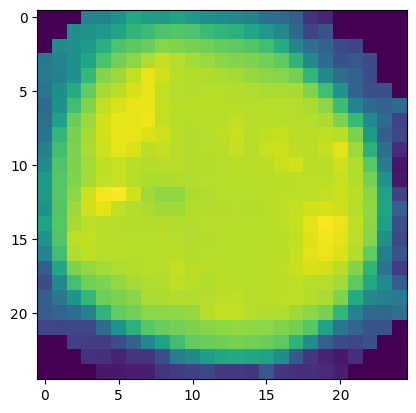

In [12]:
plt.imshow(x_train[2]), x_train[2].shape

## RGB Modeling

### Unaugmented

#### Naive Bayes

In [40]:
from sklearn import naive_bayes

nb_cls = naive_bayes.GaussianNB()
nb_cls.fit(x_train.reshape(n_train, -1), y_train)
preds_train = nb_cls.predict(x_train.reshape(n_train, -1))
preds_val   = nb_cls.predict(x_val.reshape(n_val, -1))
preds_test  = nb_cls.predict(x_test.reshape(n_test, -1))

print("Training Classification Report: \n", classification_report(y_train, preds_train, digits = N_DIGITS))
print("\nValidation Classification Report: \n", classification_report(y_val, preds_val, digits = N_DIGITS))
print("\nTesting Classification Report: \n", classification_report(y_test, preds_test, digits = N_DIGITS))

# eval = testing_module.ModelEvaluation(y_val, 
#     nb_cls.predict(x_val.reshape(n_val, -1)),
#     model_reference_name = 'Naive Bayes',
#     model_type = 'classification',
#     plot_classification_metric = ['roc_auc']) # if classification
# eval.evaluate(evaluate_save= True, plots_show = True)

Training Classification Report: 
               precision    recall  f1-score   support

         0.0      0.611     0.746     0.672     10260
         1.0      0.677     0.530     0.594     10341

    accuracy                          0.637     20601
   macro avg      0.644     0.638     0.633     20601
weighted avg      0.644     0.637     0.633     20601


Validation Classification Report: 
               precision    recall  f1-score   support

         0.0      0.620     0.761     0.683      1466
         1.0      0.693     0.538     0.606      1477

    accuracy                          0.649      2943
   macro avg      0.657     0.649     0.644      2943
weighted avg      0.657     0.649     0.644      2943


Testing Classification Report: 
               precision    recall  f1-score   support

         0.0      0.613     0.766     0.681      1303
         1.0      0.692     0.521     0.595      1314

    accuracy                          0.643      2617
   macro avg      0.653

#### Logistic Regression

Epoch 1/100
41/41 [==============================] - 1s 6ms/step - loss: 0.7001 - accuracy: 0.5477 - val_loss: 0.6641 - val_accuracy: 0.5994
Epoch 2/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6591 - accuracy: 0.6098 - val_loss: 0.6541 - val_accuracy: 0.6092
Epoch 3/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6455 - accuracy: 0.6239 - val_loss: 0.6298 - val_accuracy: 0.6453
Epoch 4/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6295 - accuracy: 0.6464 - val_loss: 0.6219 - val_accuracy: 0.6510
Epoch 5/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6230 - accuracy: 0.6522 - val_loss: 0.6134 - val_accuracy: 0.6643
Epoch 6/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6151 - accuracy: 0.6637 - val_loss: 0.6096 - val_accuracy: 0.6714
Epoch 7/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6121 - accuracy: 0.6664 - val_loss: 0.6055 - val_accuracy: 0.6724
Epoch 8/100
4

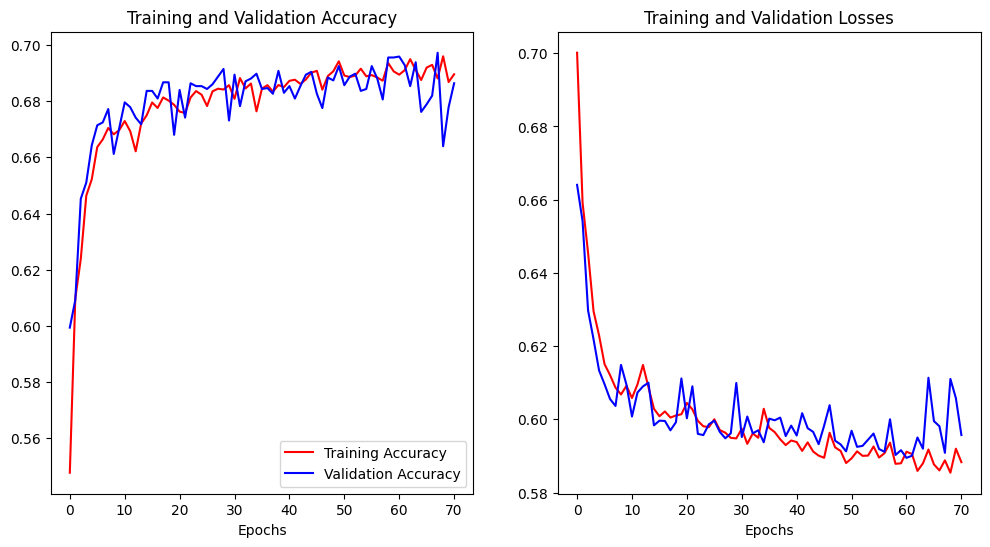

Training Classification Report: 
               precision    recall  f1-score   support

         0.0      0.701     0.687     0.694     10260
         1.0      0.695     0.710     0.703     10341

    accuracy                          0.698     20601
   macro avg      0.698     0.698     0.698     20601
weighted avg      0.698     0.698     0.698     20601


Validation Classification Report: 
               precision    recall  f1-score   support

         0.0      0.696     0.692     0.694      1466
         1.0      0.696     0.699     0.698      1477

    accuracy                          0.696      2943
   macro avg      0.696     0.696     0.696      2943
weighted avg      0.696     0.696     0.696      2943


Testing Classification Report: 
               precision    recall  f1-score   support

         0.0      0.693     0.691     0.692      1303
         1.0      0.695     0.696     0.696      1314

    accuracy                          0.694      2617
   macro avg      0.694

In [41]:
from sklearn.linear_model import LogisticRegression

logreg_cls =  tf.keras.Sequential([tf.keras.layers.Dense(2, activation = 'sigmoid', input_dim = HEIGHT * WIDTH * 3)])
logreg_cls.compile(optimizer = tf.optimizers.Adam(0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = logreg_cls.fit(x_train.reshape(n_train, -1), 
                        y_train,
                        batch_size = 512,
                        validation_data=[x_val.reshape(n_val, -1), y_val],
                        validation_batch_size=128,
                        epochs = 100,
                        callbacks =  [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10),
                                     tf.keras.callbacks.ModelCheckpoint(str = 'val_loss', save_best_only = True, save_weights_only = True, filepath= "LR_No_Aug")],
                        verbose = 1)

logreg_cls.load_weights('LR_No_Aug')
preds_train = np.argmax(logreg_cls.predict(x_train.reshape(n_train, -1)), axis = 1)
preds_val   = np.argmax(logreg_cls.predict(x_val.reshape(n_val, -1)), axis = 1)
preds_test  = np.argmax(logreg_cls.predict(x_test.reshape(n_test, -1)), axis = 1)

fig, ax = plot_history(history)

fig.savefig(PLOT_SAVE + "logreg_unaug_losscurve.png", facecolor = 'white')

print("Training Classification Report: \n", classification_report(y_train, preds_train, digits = N_DIGITS))
print("\nValidation Classification Report: \n", classification_report(y_val, preds_val, digits = N_DIGITS))
print("\nTesting Classification Report: \n", classification_report(y_test, preds_test, digits = N_DIGITS))

#### Decision Trees

In [42]:
from sklearn.tree import DecisionTreeClassifier

dt_cls =  DecisionTreeClassifier(criterion = 'gini', splitter = 'best', max_depth = 5, min_samples_split = 2, )
dt_cls.fit(x_train.reshape(n_train, -1), y_train)
preds_train = dt_cls.predict(x_train.reshape(n_train, -1))
preds_val   = dt_cls.predict(x_val.reshape(n_val, -1))
preds_test  = dt_cls.predict(x_test.reshape(n_test, -1))

print("Training Classification Report: \n", classification_report(y_train, preds_train, digits = N_DIGITS))
print("\nValidation Classification Report: \n", classification_report(y_val, preds_val, digits = N_DIGITS))
print("\nTesting Classification Report: \n", classification_report(y_test, preds_test, digits = N_DIGITS))

# eval = testing_module.ModelEvaluation(y_val, 
#     nb_cls.predict(x_val.reshape(n_val, -1)),
#     model_reference_name = 'Naive Bayes',
#     model_type = 'classification',
#     plot_classification_metric = ['roc_auc']) # if classification
# eval.evaluate(evaluate_save= True, plots_show = True)

Training Classification Report: 
               precision    recall  f1-score   support

         0.0      0.685     0.774     0.727     10260
         1.0      0.743     0.646     0.691     10341

    accuracy                          0.710     20601
   macro avg      0.714     0.710     0.709     20601
weighted avg      0.714     0.710     0.709     20601


Validation Classification Report: 
               precision    recall  f1-score   support

         0.0      0.676     0.774     0.721      1466
         1.0      0.738     0.632     0.681      1477

    accuracy                          0.702      2943
   macro avg      0.707     0.703     0.701      2943
weighted avg      0.707     0.702     0.701      2943


Testing Classification Report: 
               precision    recall  f1-score   support

         0.0      0.661     0.748     0.702      1303
         1.0      0.713     0.619     0.663      1314

    accuracy                          0.684      2617
   macro avg      0.687

#### XGBoost

In [43]:
tf.keras.backend.clear_session()

from xgboost import XGBClassifier

xgb_cls = XGBClassifier(max_depth = 5, objective = 'reg:logistic',
                            num_parallel_tree = 20, booster = 'gbtree',
                            gamma = 0.5, tree_method = 'gpu_hist', subsample = 0.4, reg_lambda = 1)
xgb_cls.fit(x_train.reshape(n_train, -1), y_train)
preds_train = xgb_cls.predict(x_train.reshape(n_train, -1))
preds_val   = xgb_cls.predict(x_val.reshape(n_val, -1))
preds_test  = xgb_cls.predict(x_test.reshape(n_test, -1))

print("Training Classification Report: \n", classification_report(y_train, preds_train, digits = N_DIGITS))
print("\nValidation Classification Report: \n", classification_report(y_val, preds_val, digits = N_DIGITS))
print("\nTesting Classification Report: \n", classification_report(y_test, preds_test, digits = N_DIGITS))
                  

Training Classification Report: 
               precision    recall  f1-score   support

         0.0      0.966     0.983     0.974     10260
         1.0      0.983     0.966     0.974     10341

    accuracy                          0.974     20601
   macro avg      0.974     0.974     0.974     20601
weighted avg      0.975     0.974     0.974     20601


Validation Classification Report: 
               precision    recall  f1-score   support

         0.0      0.842     0.873     0.857      1466
         1.0      0.869     0.837     0.853      1477

    accuracy                          0.855      2943
   macro avg      0.855     0.855     0.855      2943
weighted avg      0.855     0.855     0.855      2943


Testing Classification Report: 
               precision    recall  f1-score   support

         0.0      0.842     0.861     0.851      1303
         1.0      0.859     0.839     0.849      1314

    accuracy                          0.850      2617
   macro avg      0.850

#### SVM

In [44]:
from sklearn.svm import SVC

svm_cls = SVC(kernel = 'poly', degree = 3, gamma = 'auto', max_iter = 250, verbose= True)
svm_cls.fit(x_train.reshape(n_train, -1), y_train)
preds_train = svm_cls.predict(x_train.reshape(n_train, -1))
preds_val   = svm_cls.predict(x_val.reshape(n_val, -1))
preds_test  = svm_cls.predict(x_test.reshape(n_test, -1))

print("Training Classification Report: \n", classification_report(y_train, preds_train, digits = N_DIGITS))
print("\nValidation Classification Report: \n", classification_report(y_val, preds_val, digits = N_DIGITS))
print("\nTesting Classification Report: \n", classification_report(y_test, preds_test, digits = N_DIGITS))
                  

[LibSVM]

c:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Training Classification Report: 
               precision    recall  f1-score   support

         0.0      0.581     0.102     0.174     10260
         1.0      0.510     0.927     0.658     10341

    accuracy                          0.516     20601
   macro avg      0.545     0.515     0.416     20601
weighted avg      0.545     0.516     0.417     20601


Validation Classification Report: 
               precision    recall  f1-score   support

         0.0      0.585     0.101     0.172      1466
         1.0      0.510     0.929     0.659      1477

    accuracy                          0.516      2943
   macro avg      0.548     0.515     0.415      2943
weighted avg      0.547     0.516     0.416      2943


Testing Classification Report: 
               precision    recall  f1-score   support

         0.0      0.590     0.106     0.180      1303
         1.0      0.511     0.927     0.659      1314

    accuracy                          0.518      2617
   macro avg      0.550

#### Transfer Learning

Epoch 1/50
322/322 [==============================] - 9s 19ms/step - loss: 0.2352 - accuracy: 0.9161 - val_loss: 0.1279 - val_accuracy: 0.9531
Epoch 2/50
322/322 [==============================] - 5s 16ms/step - loss: 0.1295 - accuracy: 0.9490 - val_loss: 0.1456 - val_accuracy: 0.9439
Epoch 3/50
322/322 [==============================] - 5s 16ms/step - loss: 0.1155 - accuracy: 0.9555 - val_loss: 0.1284 - val_accuracy: 0.9501
Epoch 4/50
322/322 [==============================] - 5s 16ms/step - loss: 0.1016 - accuracy: 0.9597 - val_loss: 0.1136 - val_accuracy: 0.9616
Epoch 5/50
322/322 [==============================] - 5s 16ms/step - loss: 0.0926 - accuracy: 0.9641 - val_loss: 0.1082 - val_accuracy: 0.9626
Epoch 6/50
322/322 [==============================] - 5s 15ms/step - loss: 0.0841 - accuracy: 0.9680 - val_loss: 0.1310 - val_accuracy: 0.9609
Epoch 7/50
322/322 [==============================] - 5s 15ms/step - loss: 0.0837 - accuracy: 0.9676 - val_loss: 0.1182 - val_accuracy: 0.9558

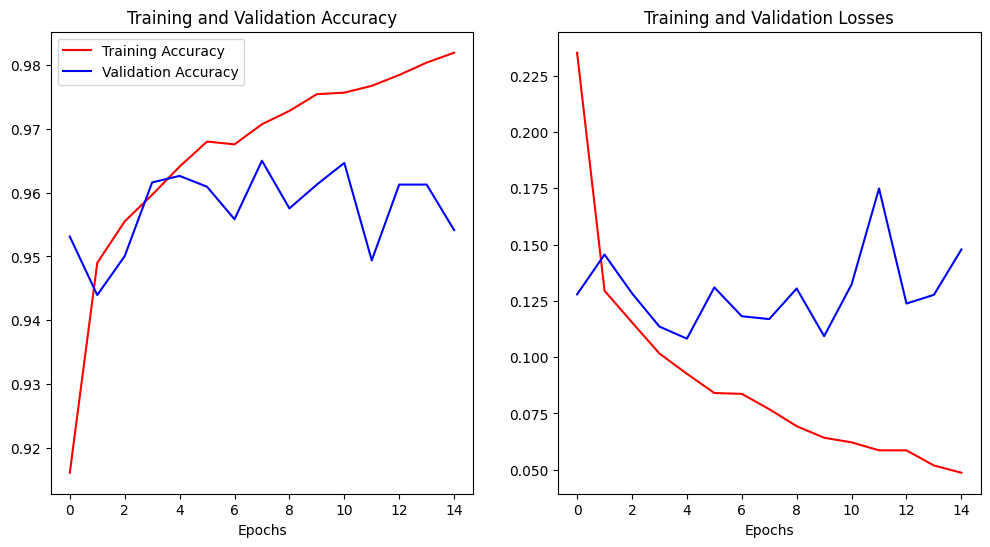

82/82 [==============================] - 1s 7ms/step
Training Classification Report: 
               precision    recall  f1-score   support

         0.0      0.959     0.985     0.972     10260
         1.0      0.985     0.958     0.971     10341

    accuracy                          0.972     20601
   macro avg      0.972     0.972     0.972     20601
weighted avg      0.972     0.972     0.972     20601


Validation Classification Report: 
               precision    recall  f1-score   support

         0.0      0.952     0.974     0.963      1466
         1.0      0.974     0.951     0.962      1477

    accuracy                          0.963      2943
   macro avg      0.963     0.963     0.963      2943
weighted avg      0.963     0.963     0.963      2943


Testing Classification Report: 
               precision    recall  f1-score   support

         0.0      0.944     0.968     0.956      1303
         1.0      0.967     0.943     0.955      1314

    accuracy            

In [45]:
imagenet = tf.keras.applications.Xception(
    weights = 'imagenet',
    include_top = False,
    input_shape = (72, 72, 3)
)
imagenet.trainable = False

trans_learn = tf.keras.Sequential([
    tf.keras.layers.Resizing(72, 72),
    imagenet,

    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(2, activation = 'sigmoid')
])

trans_learn.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.003),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

history = trans_learn.fit(
            x_train, y_train, batch_size = 64,
            shuffle = True,
            epochs = 50,
            validation_data = [x_val, y_val],
            validation_batch_size = 32,
            callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10),
                        tf.keras.callbacks.ModelCheckpoint(str = 'val_loss', save_best_only = True, save_weights_only = True, filepath= "TL_No_Aug")]
        )
fig, ax = plot_history(history)

trans_learn.load_weights('TL_No_Aug')

fig.savefig(PLOT_SAVE + "TL_unaug_losscurve.png", facecolor = 'white')
preds_train = np.argmax(trans_learn.predict(x_train), axis = 1)
preds_val   = np.argmax(trans_learn.predict(x_val), axis = 1)
preds_test  = np.argmax(trans_learn.predict(x_test), axis = 1)

print("Training Classification Report: \n", classification_report(y_train, preds_train, digits = N_DIGITS))
print("\nValidation Classification Report: \n", classification_report(y_val, preds_val, digits = N_DIGITS))
print("\nTesting Classification Report: \n", classification_report(y_test, preds_test, digits = N_DIGITS))



#### CNN Model

Epoch 1/50
21/21 [==============================] - 1s 18ms/step - loss: 0.6625 - accuracy: 0.5956 - val_loss: 0.6094 - val_accuracy: 0.6758
Epoch 2/50
21/21 [==============================] - 0s 9ms/step - loss: 0.6057 - accuracy: 0.6752 - val_loss: 0.5299 - val_accuracy: 0.7601
Epoch 3/50
21/21 [==============================] - 0s 9ms/step - loss: 0.5441 - accuracy: 0.7230 - val_loss: 0.5027 - val_accuracy: 0.7666
Epoch 4/50
21/21 [==============================] - 0s 9ms/step - loss: 0.4931 - accuracy: 0.7666 - val_loss: 0.4683 - val_accuracy: 0.7883
Epoch 5/50
21/21 [==============================] - 0s 9ms/step - loss: 0.4335 - accuracy: 0.7987 - val_loss: 0.3831 - val_accuracy: 0.8264
Epoch 6/50
21/21 [==============================] - 0s 7ms/step - loss: 0.4756 - accuracy: 0.7706 - val_loss: 0.4782 - val_accuracy: 0.7676
Epoch 7/50
21/21 [==============================] - 0s 9ms/step - loss: 0.4180 - accuracy: 0.8054 - val_loss: 0.3376 - val_accuracy: 0.8488
Epoch 8/50
21/21 [=

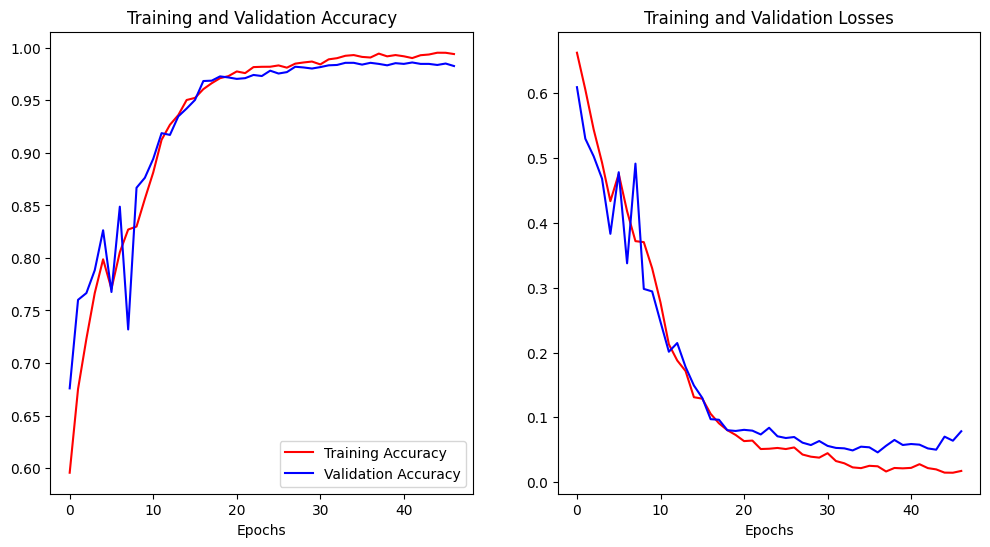

82/82 [==============================] - 0s 1ms/step
Training Classification Report: 
               precision    recall  f1-score   support

         0.0      0.994     0.997     0.996     10260
         1.0      0.997     0.994     0.996     10341

    accuracy                          0.996     20601
   macro avg      0.996     0.996     0.996     20601
weighted avg      0.996     0.996     0.996     20601


Validation Classification Report: 
               precision    recall  f1-score   support

         0.0      0.983     0.988     0.986      1466
         1.0      0.988     0.983     0.986      1477

    accuracy                          0.986      2943
   macro avg      0.986     0.986     0.986      2943
weighted avg      0.986     0.986     0.986      2943


Testing Classification Report: 
               precision    recall  f1-score   support

         0.0      0.976     0.988     0.982      1303
         1.0      0.988     0.976     0.982      1314

    accuracy            

In [46]:
cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), padding = 'same', activation = 'relu', input_shape = x_train[0].shape),
    tf.keras.layers.MaxPool2D((3,3), padding = 'same'),

    tf.keras.layers.Conv2D(32, (2,2), padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPool2D((2,2), padding = 'same'),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation = 'sigmoid')
])

cnn.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.003),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

history = cnn.fit(
            x_train, y_train, batch_size = 1024,
            epochs = 50,
            validation_data = [x_val, y_val],
            validation_batch_size = 256,
            callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10),
                         tf.keras.callbacks.ModelCheckpoint(str = 'val_loss', save_best_only = True, save_weights_only = True, filepath= "CNN_No_Aug")]
        )


cnn.load_weights('CNN_No_Aug')
fig, ax = plot_history(history)

fig.savefig(PLOT_SAVE + "CNN_unaug_losscurve.png", facecolor = 'white')
preds_train = np.argmax(cnn.predict(x_train), axis = 1)
preds_val   = np.argmax(cnn.predict(x_val), axis = 1)
preds_test  = np.argmax(cnn.predict(x_test), axis = 1)

print("Training Classification Report: \n", classification_report(y_train, preds_train, digits = N_DIGITS))
print("\nValidation Classification Report: \n", classification_report(y_val, preds_val, digits = N_DIGITS))
print("\nTesting Classification Report: \n", classification_report(y_test, preds_test, digits = N_DIGITS))

### Augmented Dataset

#### Naive Bayes

In [47]:
from sklearn import naive_bayes

nb_cls = naive_bayes.GaussianNB()
nb_cls.fit(x_train_aug.reshape(n_aug_train, -1), y_train_aug)
preds_train = nb_cls.predict(x_train_aug.reshape(n_aug_train, -1))
preds_val   = nb_cls.predict(x_val.reshape(n_val, -1))
preds_test  = nb_cls.predict(x_test.reshape(n_test, -1))

print("Training Classification Report: \n", classification_report(y_train_aug, preds_train, digits = N_DIGITS))
print("\nValidation Classification Report: \n", classification_report(y_val, preds_val, digits = N_DIGITS))
print("\nTesting Classification Report: \n", classification_report(y_test, preds_test, digits = N_DIGITS))

Training Classification Report: 
               precision    recall  f1-score   support

         0.0      0.607     0.760     0.675     20520
         1.0      0.683     0.512     0.586     20682

    accuracy                          0.636     41202
   macro avg      0.645     0.636     0.631     41202
weighted avg      0.645     0.636     0.630     41202


Validation Classification Report: 
               precision    recall  f1-score   support

         0.0      0.000     0.000     0.000      1466
         1.0      0.502     1.000     0.668      1477

    accuracy                          0.502      2943
   macro avg      0.251     0.500     0.334      2943
weighted avg      0.252     0.502     0.335      2943


Testing Classification Report: 
               precision    recall  f1-score   support

         0.0      0.000     0.000     0.000      1303
         1.0      0.502     1.000     0.669      1314

    accuracy                          0.502      2617
   macro avg      0.251

c:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\m

#### Logistic Regression

Epoch 1/100
81/81 [==============================] - 0s 3ms/step - loss: 27.6512 - accuracy: 0.5376 - val_loss: 0.6819 - val_accuracy: 0.6007
Epoch 2/100
81/81 [==============================] - 0s 2ms/step - loss: 10.8976 - accuracy: 0.5726 - val_loss: 0.6814 - val_accuracy: 0.6055
Epoch 3/100
81/81 [==============================] - 0s 2ms/step - loss: 21.7795 - accuracy: 0.5545 - val_loss: 0.6752 - val_accuracy: 0.6466
Epoch 4/100
81/81 [==============================] - 0s 2ms/step - loss: 8.6269 - accuracy: 0.6051 - val_loss: 0.6807 - val_accuracy: 0.6432
Epoch 5/100
81/81 [==============================] - 0s 2ms/step - loss: 8.6525 - accuracy: 0.5836 - val_loss: 0.6813 - val_accuracy: 0.6075
Epoch 6/100
81/81 [==============================] - 0s 3ms/step - loss: 11.2940 - accuracy: 0.5716 - val_loss: 0.6885 - val_accuracy: 0.5022
Epoch 7/100
81/81 [==============================] - 0s 2ms/step - loss: 11.3517 - accuracy: 0.5891 - val_loss: 0.6810 - val_accuracy: 0.6018
Epoch 8/

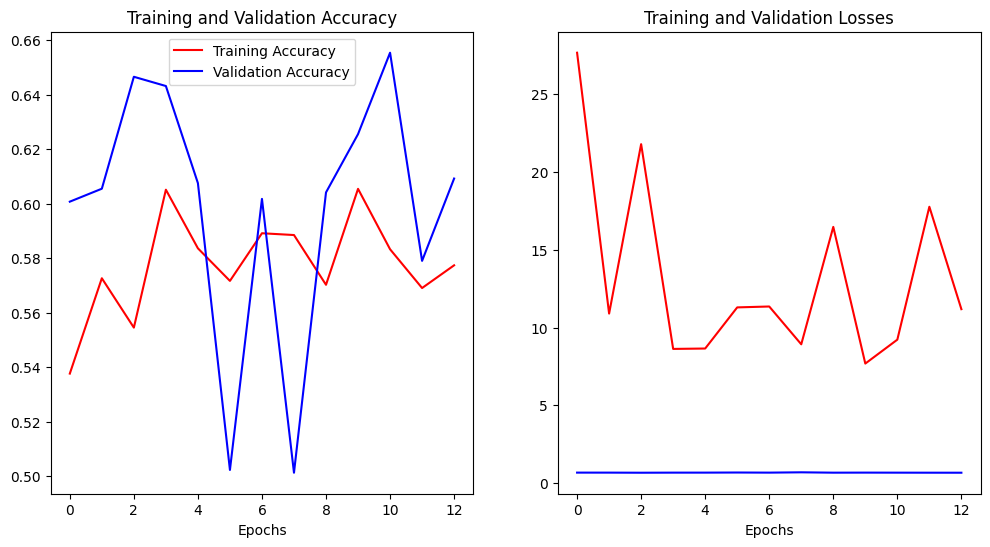

Training Classification Report: 
               precision    recall  f1-score   support

         0.0      0.638     0.430     0.514     20520
         1.0      0.573     0.759     0.653     20682

    accuracy                          0.595     41202
   macro avg      0.606     0.594     0.583     41202
weighted avg      0.605     0.595     0.583     41202


Validation Classification Report: 
               precision    recall  f1-score   support

         0.0      0.813     0.280     0.416      1466
         1.0      0.567     0.936     0.706      1477

    accuracy                          0.609      2943
   macro avg      0.690     0.608     0.561      2943
weighted avg      0.690     0.609     0.562      2943


Testing Classification Report: 
               precision    recall  f1-score   support

         0.0      0.776     0.243     0.370      1303
         1.0      0.553     0.931     0.694      1314

    accuracy                          0.588      2617
   macro avg      0.665

In [48]:
from sklearn.linear_model import LogisticRegression

logreg_cls =  tf.keras.Sequential([tf.keras.layers.Dense(2, activation = 'sigmoid', input_dim = HEIGHT * WIDTH * 3)])
logreg_cls.compile(optimizer = tf.optimizers.Adam(0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = logreg_cls.fit(x_train_aug.reshape(n_aug_train, -1), 
                        y_train_aug,
                        batch_size = 512,
                        validation_data=[x_val.reshape(n_val, -1), y_val],
                        validation_batch_size=128,
                        epochs = 100,
                        callbacks =  [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10),
                                    tf.keras.callbacks.ModelCheckpoint(str = 'val_loss', save_best_only = True, save_weights_only = True, filepath= "LR_Aug")])
preds_train = np.argmax(logreg_cls.predict(x_train_aug.reshape(n_aug_train, -1)), axis = 1)
preds_val   = np.argmax(logreg_cls.predict(x_val.reshape(n_val, -1)), axis = 1)
preds_test  = np.argmax(logreg_cls.predict(x_test.reshape(n_test, -1)), axis = 1)

logreg_cls.load_weights('LR_Aug')
fig, ax = plot_history(history)

fig.savefig(PLOT_SAVE + "logreg_aug_losscurve.png", facecolor = 'white')

print("Training Classification Report: \n", classification_report(y_train_aug, preds_train, digits = N_DIGITS))
print("\nValidation Classification Report: \n", classification_report(y_val, preds_val, digits = N_DIGITS))
print("\nTesting Classification Report: \n", classification_report(y_test, preds_test, digits = N_DIGITS))

#### Decision Trees

In [49]:
from sklearn.tree import DecisionTreeClassifier

dt_cls =  DecisionTreeClassifier(criterion = 'gini', splitter = 'best', max_depth = 5, min_samples_split = 2, )
dt_cls.fit(x_train_aug.reshape(n_aug_train, -1), y_train_aug)
preds_train = dt_cls.predict(x_train_aug.reshape(n_aug_train, -1))
preds_val   = dt_cls.predict(x_val.reshape(n_val, -1))
preds_test  = dt_cls.predict(x_test.reshape(n_test, -1))

print("Training Classification Report: \n", classification_report(y_train_aug, preds_train, digits = N_DIGITS))
print("\nValidation Classification Report: \n", classification_report(y_val, preds_val, digits = N_DIGITS))
print("\nTesting Classification Report: \n", classification_report(y_test, preds_test, digits = N_DIGITS))

# eval = testing_module.ModelEvaluation(y_val, 
#     nb_cls.predict(x_val.reshape(n_val, -1)),
#     model_reference_name = 'Naive Bayes',
#     model_type = 'classification',
#     plot_classification_metric = ['roc_auc']) # if classification
# eval.evaluate(evaluate_save= True, plots_show = True)

Training Classification Report: 
               precision    recall  f1-score   support

         0.0      0.687     0.768     0.725     20520
         1.0      0.739     0.653     0.693     20682

    accuracy                          0.710     41202
   macro avg      0.713     0.710     0.709     41202
weighted avg      0.713     0.710     0.709     41202


Validation Classification Report: 
               precision    recall  f1-score   support

         0.0      0.000     0.000     0.000      1466
         1.0      0.502     1.000     0.668      1477

    accuracy                          0.502      2943
   macro avg      0.251     0.500     0.334      2943
weighted avg      0.252     0.502     0.335      2943


Testing Classification Report: 
               precision    recall  f1-score   support

         0.0      0.000     0.000     0.000      1303
         1.0      0.502     1.000     0.669      1314

    accuracy                          0.502      2617
   macro avg      0.251

c:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\m

#### XGBoost

In [50]:
from xgboost import XGBClassifier

xgb_cls = XGBClassifier(max_depth = 5, objective = 'reg:logistic',
                            num_parallel_tree = 20, booster = 'gbtree',
                            gamma = 0.5, tree_method = 'gpu_hist', subsample = 0.4, reg_lambda = 1)
xgb_cls.fit(x_train_aug.reshape(n_aug_train, -1), y_train_aug)
preds_train = xgb_cls.predict(x_train_aug.reshape(n_aug_train, -1))
preds_val   = xgb_cls.predict(x_val.reshape(n_val, -1))
preds_test  = xgb_cls.predict(x_test.reshape(n_test, -1))

print("Training Classification Report: \n", classification_report(y_train_aug, preds_train, digits = N_DIGITS))
print("\nValidation Classification Report: \n", classification_report(y_val, preds_val, digits = N_DIGITS))
print("\nTesting Classification Report: \n", classification_report(y_test, preds_test, digits = N_DIGITS))
                  

Training Classification Report: 
               precision    recall  f1-score   support

         0.0      0.915     0.954     0.934     20520
         1.0      0.953     0.912     0.932     20682

    accuracy                          0.933     41202
   macro avg      0.934     0.933     0.933     41202
weighted avg      0.934     0.933     0.933     41202


Validation Classification Report: 
               precision    recall  f1-score   support

         0.0      0.498     1.000     0.665      1466
         1.0      0.000     0.000     0.000      1477

    accuracy                          0.498      2943
   macro avg      0.249     0.500     0.333      2943
weighted avg      0.248     0.498     0.331      2943


Testing Classification Report: 
               precision    recall  f1-score   support

         0.0      0.498     1.000     0.665      1303
         1.0      0.000     0.000     0.000      1314

    accuracy                          0.498      2617
   macro avg      0.249

c:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\m

#### SVM

In [51]:
from sklearn.svm import SVC

svm_cls = SVC(kernel = 'rbf', max_iter = 250, verbose= True)
svm_cls.fit(x_train_aug.reshape(n_aug_train, -1), y_train_aug)
preds_train = svm_cls.predict(x_train_aug.reshape(n_aug_train, -1))
preds_val   = svm_cls.predict(x_val.reshape(n_val, -1))
preds_test  = svm_cls.predict(x_test.reshape(n_test, -1))

print("Training Classification Report: \n", classification_report(y_train_aug, preds_train, digits = N_DIGITS))
print("\nValidation Classification Report: \n", classification_report(y_val, preds_val, digits = N_DIGITS))
print("\nTesting Classification Report: \n", classification_report(y_test, preds_test, digits = N_DIGITS))
                  

[LibSVM]

c:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Training Classification Report: 
               precision    recall  f1-score   support

         0.0      0.449     0.132     0.204     20520
         1.0      0.494     0.840     0.622     20682

    accuracy                          0.487     41202
   macro avg      0.472     0.486     0.413     41202
weighted avg      0.472     0.487     0.414     41202


Validation Classification Report: 
               precision    recall  f1-score   support

         0.0      0.498     1.000     0.665      1466
         1.0      0.000     0.000     0.000      1477

    accuracy                          0.498      2943
   macro avg      0.249     0.500     0.333      2943
weighted avg      0.248     0.498     0.331      2943


Testing Classification Report: 
               precision    recall  f1-score   support

         0.0      0.498     1.000     0.665      1303
         1.0      0.000     0.000     0.000      1314

    accuracy                          0.498      2617
   macro avg      0.249

c:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\m

#### Transfer Learning

Epoch 1/50
322/322 [==============================] - 11s 27ms/step - loss: 1.2411 - accuracy: 0.6869 - val_loss: 0.6934 - val_accuracy: 0.5019
Epoch 2/50
322/322 [==============================] - 8s 24ms/step - loss: 0.5090 - accuracy: 0.7442 - val_loss: 0.6945 - val_accuracy: 0.5019
Epoch 3/50
322/322 [==============================] - 8s 24ms/step - loss: 0.4849 - accuracy: 0.7584 - val_loss: 0.6968 - val_accuracy: 0.5019
Epoch 4/50
322/322 [==============================] - 8s 24ms/step - loss: 0.4753 - accuracy: 0.7656 - val_loss: 0.6984 - val_accuracy: 0.5019
Epoch 5/50
322/322 [==============================] - 8s 24ms/step - loss: 0.4640 - accuracy: 0.7715 - val_loss: 0.7003 - val_accuracy: 0.5019
Epoch 6/50
322/322 [==============================] - 8s 24ms/step - loss: 0.4652 - accuracy: 0.7737 - val_loss: 0.7037 - val_accuracy: 0.5019


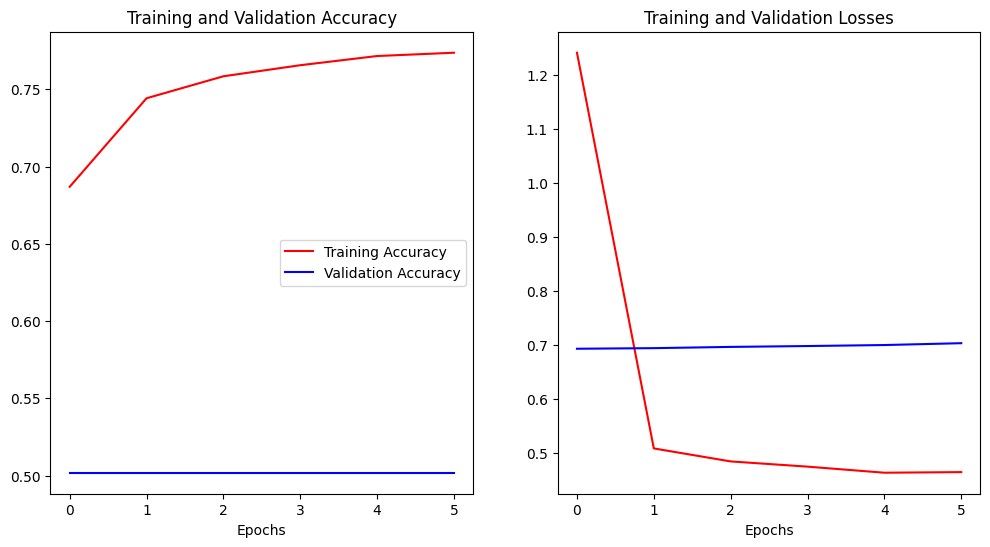

82/82 [==============================] - 1s 7ms/step
Training Classification Report: 
               precision    recall  f1-score   support

         0.0      0.765     0.754     0.760     20520
         1.0      0.760     0.770     0.765     20682

    accuracy                          0.762     41202
   macro avg      0.762     0.762     0.762     41202
weighted avg      0.762     0.762     0.762     41202


Validation Classification Report: 
               precision    recall  f1-score   support

         0.0      0.000     0.000     0.000      1466
         1.0      0.502     1.000     0.668      1477

    accuracy                          0.502      2943
   macro avg      0.251     0.500     0.334      2943
weighted avg      0.252     0.502     0.335      2943


Testing Classification Report: 
               precision    recall  f1-score   support

         0.0      0.000     0.000     0.000      1303
         1.0      0.502     1.000     0.669      1314

    accuracy            

c:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\m

In [52]:
imagenet = tf.keras.applications.Xception(
    weights = 'imagenet',
    include_top = False,
    input_shape = (72, 72, 3)
)
imagenet.trainable = False

trans_learn = tf.keras.Sequential([
    tf.keras.layers.Resizing(72, 72),
    imagenet,

    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(2, activation = 'sigmoid')
])

trans_learn.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

history = trans_learn.fit(
            x_train_aug, y_train_aug, batch_size = 128,
            shuffle = True,
            epochs = 50,
            validation_data = [x_val, y_val],
            validation_batch_size = 64,
            callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5),
                        tf.keras.callbacks.ModelCheckpoint(str = 'val_loss', save_best_only = True, save_weights_only = True, filepath= "TL_Aug")]
        )

trans_learn.load_weights('TL_Aug')

fig, ax = plot_history(history)

fig.savefig(PLOT_SAVE + "TL_aug_losscurve.png", facecolor = 'white')
preds_train = np.argmax(trans_learn.predict(x_train_aug), axis = 1)
preds_val   = np.argmax(trans_learn.predict(x_val), axis = 1)
preds_test  = np.argmax(trans_learn.predict(x_test), axis = 1)

print("Training Classification Report: \n", classification_report(y_train_aug, preds_train, digits = N_DIGITS))
print("\nValidation Classification Report: \n", classification_report(y_val, preds_val, digits = N_DIGITS))
print("\nTesting Classification Report: \n", classification_report(y_test, preds_test, digits = N_DIGITS))



#### CNN Model

Epoch 1/50
161/161 [==============================] - 1s 4ms/step - loss: 3.2800 - accuracy: 0.5011 - val_loss: 0.6931 - val_accuracy: 0.5019
Epoch 2/50
161/161 [==============================] - 1s 3ms/step - loss: 0.6945 - accuracy: 0.5011 - val_loss: 0.6932 - val_accuracy: 0.5019
Epoch 3/50
161/161 [==============================] - 1s 3ms/step - loss: 0.6905 - accuracy: 0.5182 - val_loss: 0.6933 - val_accuracy: 0.4981
Epoch 4/50
161/161 [==============================] - 1s 3ms/step - loss: 0.6869 - accuracy: 0.5327 - val_loss: 0.6934 - val_accuracy: 0.4981
Epoch 5/50
161/161 [==============================] - 1s 3ms/step - loss: 0.6775 - accuracy: 0.5558 - val_loss: 0.6937 - val_accuracy: 0.4981
Epoch 6/50
161/161 [==============================] - 1s 3ms/step - loss: 0.6701 - accuracy: 0.5754 - val_loss: 0.6960 - val_accuracy: 0.4981


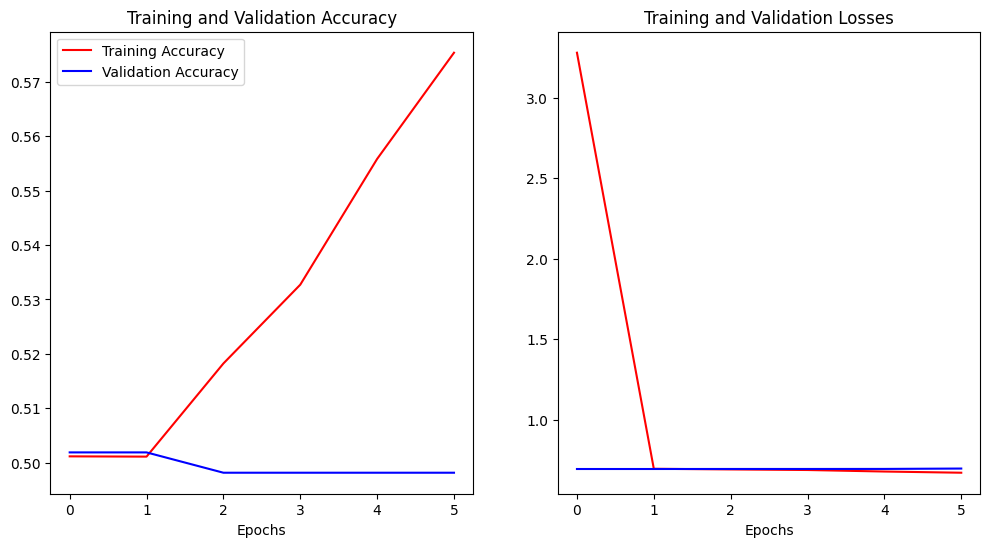

82/82 [==============================] - 0s 1ms/step
Training Classification Report: 
               precision    recall  f1-score   support

         0.0      0.487     0.011     0.021     20520
         1.0      0.502     0.989     0.666     20682

    accuracy                          0.502     41202
   macro avg      0.494     0.500     0.344     41202
weighted avg      0.494     0.502     0.345     41202


Validation Classification Report: 
               precision    recall  f1-score   support

         0.0      0.000     0.000     0.000      1466
         1.0      0.502     1.000     0.668      1477

    accuracy                          0.502      2943
   macro avg      0.251     0.500     0.334      2943
weighted avg      0.252     0.502     0.335      2943


Testing Classification Report: 
               precision    recall  f1-score   support

         0.0      0.000     0.000     0.000      1303
         1.0      0.502     1.000     0.669      1314

    accuracy            

c:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\m

In [53]:
cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), padding = 'same', activation = 'relu', input_shape = x_train[0].shape),
    tf.keras.layers.MaxPool2D((3,3), padding = 'same'),

    tf.keras.layers.Conv2D(32, (2,2), padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPool2D((2,2), padding = 'same'),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation = 'sigmoid')
])

cnn.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

history = cnn.fit(
            x_train_aug, y_train_aug, batch_size = 256,
            epochs = 50,
            shuffle = True,
            validation_data = [x_val, y_val],
            validation_batch_size = 128,
            callbacks = [
                tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5),
                tf.keras.callbacks.ModelCheckpoint(str = 'val_loss', save_best_only = True, save_weights_only = True, filepath= "CNN_Aug")
            ]
        )

fig, ax = plot_history(history)

cnn.load_weights('CNN_Aug')

fig.savefig(PLOT_SAVE + "CNN_aug_losscurve.png", facecolor = 'white')
preds_train = np.argmax(cnn.predict(x_train_aug), axis = 1)
preds_val   = np.argmax(cnn.predict(x_val), axis = 1)
preds_test  = np.argmax(cnn.predict(x_test), axis = 1)

print("Training Classification Report: \n", classification_report(y_train_aug, preds_train, digits = N_DIGITS))
print("\nValidation Classification Report: \n", classification_report(y_val, preds_val, digits = N_DIGITS))
print("\nTesting Classification Report: \n", classification_report(y_test, preds_test, digits = N_DIGITS))

## HSV Modelling with only the saturation dimension

Transfer learning does not work since it requires exactly 3 input channels (Xception, VGG19, etc)

### Preparing Datasets

In [10]:
temp = []
for img in tqdm(x_train):
    temp.append(rgb2hsv(img))
temp = np.array(temp)[..., 1]
x_train = temp
x_train = x_train[..., np.newaxis]

temp = []
for img in tqdm(x_val):
    temp.append(rgb2hsv(img))
temp = np.array(temp)[..., 1]
x_val = temp
x_val = x_val[..., np.newaxis]

temp = []
for img in tqdm(x_test):
    temp.append(rgb2hsv(img))
temp = np.array(temp)[..., 1]
x_test = temp
x_test = x_test[..., np.newaxis]


temp = []
for img in tqdm(x_train_aug):
    temp.append(rgb2hsv(img))
temp = np.array(temp)[..., 1]
x_train_aug = temp
x_train_aug = x_train_aug[..., np.newaxis]



x_train.shape, x_val.shape, x_test.shape

100%|██████████| 41202/41202 [00:06<00:00, 6203.58it/s]


((20601, 25, 25, 1), (2943, 25, 25, 1), (2617, 25, 25, 1))

### Unaugmented

#### Naive Bayes

In [12]:
from sklearn import naive_bayes

nb_cls = naive_bayes.GaussianNB()
nb_cls.fit(x_train.reshape(n_train, -1), y_train)
preds_train = nb_cls.predict(x_train.reshape(n_train, -1))
preds_val   = nb_cls.predict(x_val.reshape(n_val, -1))
preds_test  = nb_cls.predict(x_test.reshape(n_test, -1))

print("Training Classification Report: \n", classification_report(y_train, preds_train, digits = N_DIGITS))
print("\nValidation Classification Report: \n", classification_report(y_val, preds_val, digits = N_DIGITS))
print("\nTesting Classification Report: \n", classification_report(y_test, preds_test, digits = N_DIGITS))

# eval = testing_module.ModelEvaluation(y_val, 
#     nb_cls.predict(x_val.reshape(n_val, -1)),
#     model_reference_name = 'Naive Bayes',
#     model_type = 'classification',
#     plot_classification_metric = ['roc_auc']) # if classification
# eval.evaluate(evaluate_save= True, plots_show = True)

Training Classification Report: 
               precision    recall  f1-score   support

         0.0      0.607     0.565     0.585     10260
         1.0      0.596     0.636     0.615     10341

    accuracy                          0.601     20601
   macro avg      0.601     0.601     0.600     20601
weighted avg      0.601     0.601     0.600     20601


Validation Classification Report: 
               precision    recall  f1-score   support

         0.0      0.604     0.586     0.595      1466
         1.0      0.601     0.618     0.609      1477

    accuracy                          0.602      2943
   macro avg      0.602     0.602     0.602      2943
weighted avg      0.602     0.602     0.602      2943


Testing Classification Report: 
               precision    recall  f1-score   support

         0.0      0.632     0.585     0.607      1303
         1.0      0.617     0.662     0.639      1314

    accuracy                          0.624      2617
   macro avg      0.624

#### Logistic Regression

Epoch 1/100
41/41 [==============================] - 1s 6ms/step - loss: 0.6936 - accuracy: 0.5144 - val_loss: 0.6743 - val_accuracy: 0.5260
Epoch 2/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6704 - accuracy: 0.5738 - val_loss: 0.6610 - val_accuracy: 0.5929
Epoch 3/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6579 - accuracy: 0.6304 - val_loss: 0.6498 - val_accuracy: 0.6521
Epoch 4/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6484 - accuracy: 0.6475 - val_loss: 0.6431 - val_accuracy: 0.6677
Epoch 5/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6426 - accuracy: 0.6536 - val_loss: 0.6367 - val_accuracy: 0.6558
Epoch 6/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6360 - accuracy: 0.6585 - val_loss: 0.6295 - val_accuracy: 0.6701
Epoch 7/100
41/41 [==============================] - 0s 3ms/step - loss: 0.6309 - accuracy: 0.6639 - val_loss: 0.6249 - val_accuracy: 0.6765
Epoch 8/100
4

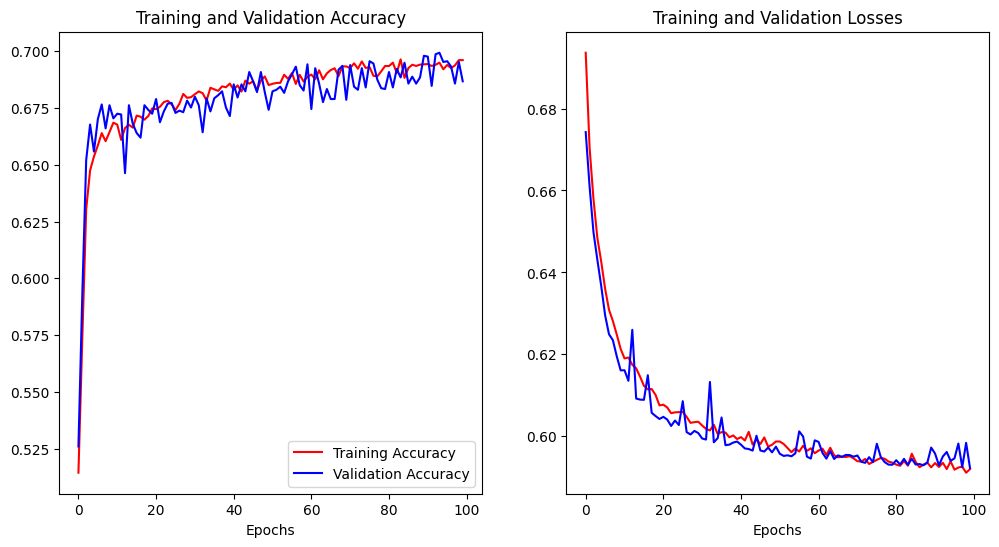

Training Classification Report: 
               precision    recall  f1-score   support

         0.0      0.692     0.706     0.699     10260
         1.0      0.702     0.688     0.695     10341

    accuracy                          0.697     20601
   macro avg      0.697     0.697     0.697     20601
weighted avg      0.697     0.697     0.697     20601


Validation Classification Report: 
               precision    recall  f1-score   support

         0.0      0.679     0.703     0.691      1466
         1.0      0.694     0.671     0.683      1477

    accuracy                          0.687      2943
   macro avg      0.687     0.687     0.687      2943
weighted avg      0.687     0.687     0.687      2943


Testing Classification Report: 
               precision    recall  f1-score   support

         0.0      0.671     0.687     0.679      1303
         1.0      0.682     0.667     0.674      1314

    accuracy                          0.677      2617
   macro avg      0.677

In [13]:
from sklearn.linear_model import LogisticRegression

logreg_cls =  tf.keras.Sequential([tf.keras.layers.Dense(2, activation = 'sigmoid', input_dim = HEIGHT * WIDTH)])
logreg_cls.compile(optimizer = tf.optimizers.Adam(0.002), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = logreg_cls.fit(x_train.reshape(n_train, -1), 
                        y_train,
                        batch_size = 512,
                        validation_data=[x_val.reshape(n_val, -1), y_val],
                        validation_batch_size=128,
                        epochs = 100,
                        callbacks =  [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10),
                                     tf.keras.callbacks.ModelCheckpoint(str = 'val_loss', save_best_only = True, save_weights_only = True, filepath= "LR_No_Aug_HSV")],
                        verbose = 1)

logreg_cls.load_weights('LR_No_Aug_HSV')
preds_train = np.argmax(logreg_cls.predict(x_train.reshape(n_train, -1)), axis = 1)
preds_val   = np.argmax(logreg_cls.predict(x_val.reshape(n_val, -1)), axis = 1)
preds_test  = np.argmax(logreg_cls.predict(x_test.reshape(n_test, -1)), axis = 1)

fig, ax = plot_history(history)

fig.savefig(PLOT_SAVE + "logreg_unaug_losscurve_HSV.png", facecolor = 'white')

print("Training Classification Report: \n", classification_report(y_train, preds_train, digits = N_DIGITS))
print("\nValidation Classification Report: \n", classification_report(y_val, preds_val, digits = N_DIGITS))
print("\nTesting Classification Report: \n", classification_report(y_test, preds_test, digits = N_DIGITS))

#### Decision Trees

In [14]:
from sklearn.tree import DecisionTreeClassifier

dt_cls =  DecisionTreeClassifier(criterion = 'gini', splitter = 'best', max_depth = 12, min_samples_split = 2, )
dt_cls.fit(x_train.reshape(n_train, -1), y_train)
preds_train = dt_cls.predict(x_train.reshape(n_train, -1))
preds_val   = dt_cls.predict(x_val.reshape(n_val, -1))
preds_test  = dt_cls.predict(x_test.reshape(n_test, -1))

print("Training Classification Report: \n", classification_report(y_train, preds_train, digits = N_DIGITS))
print("\nValidation Classification Report: \n", classification_report(y_val, preds_val, digits = N_DIGITS))
print("\nTesting Classification Report: \n", classification_report(y_test, preds_test, digits = N_DIGITS))

# eval = testing_module.ModelEvaluation(y_val, 
#     nb_cls.predict(x_val.reshape(n_val, -1)),
#     model_reference_name = 'Naive Bayes',
#     model_type = 'classification',
#     plot_classification_metric = ['roc_auc']) # if classification
# eval.evaluate(evaluate_save= True, plots_show = True)

Training Classification Report: 
               precision    recall  f1-score   support

         0.0      0.761     0.837     0.797     10260
         1.0      0.821     0.739     0.778     10341

    accuracy                          0.788     20601
   macro avg      0.791     0.788     0.787     20601
weighted avg      0.791     0.788     0.787     20601


Validation Classification Report: 
               precision    recall  f1-score   support

         0.0      0.667     0.760     0.711      1466
         1.0      0.724     0.624     0.670      1477

    accuracy                          0.692      2943
   macro avg      0.696     0.692     0.690      2943
weighted avg      0.696     0.692     0.690      2943


Testing Classification Report: 
               precision    recall  f1-score   support

         0.0      0.653     0.740     0.694      1303
         1.0      0.703     0.610     0.653      1314

    accuracy                          0.675      2617
   macro avg      0.678

#### XGBoost

In [11]:
tf.keras.backend.clear_session()
from xgboost import XGBClassifier

xgb_cls = XGBClassifier(max_depth = 10, objective = 'reg:logistic',
                            num_parallel_tree = 20, booster = 'gbtree',
                            gamma = 0.5, tree_method = 'gpu_hist', subsample = 0.4, reg_lambda = 1)
setattr(xgb_cls, 'verbosity', 1)
xgb_cls.fit(x_train.reshape(n_train, -1), y_train)
preds_train = xgb_cls.predict(x_train.reshape(n_train, -1))
preds_val   = xgb_cls.predict(x_val.reshape(n_val, -1))
preds_test  = xgb_cls.predict(x_test.reshape(n_test, -1))

print("Training Classification Report: \n", classification_report(y_train, preds_train, digits = N_DIGITS))
print("\nValidation Classification Report: \n", classification_report(y_val, preds_val, digits = N_DIGITS))
print("\nTesting Classification Report: \n", classification_report(y_test, preds_test, digits = N_DIGITS))
                  

Training Classification Report: 
               precision    recall  f1-score   support

         0.0      0.998     0.999     0.999     10260
         1.0      0.999     0.998     0.999     10341

    accuracy                          0.999     20601
   macro avg      0.999     0.999     0.999     20601
weighted avg      0.999     0.999     0.999     20601


Validation Classification Report: 
               precision    recall  f1-score   support

         0.0      0.904     0.954     0.928      1466
         1.0      0.951     0.899     0.924      1477

    accuracy                          0.926      2943
   macro avg      0.927     0.926     0.926      2943
weighted avg      0.928     0.926     0.926      2943


Testing Classification Report: 
               precision    recall  f1-score   support

         0.0      0.920     0.959     0.939      1303
         1.0      0.957     0.918     0.937      1314

    accuracy                          0.938      2617
   macro avg      0.939

#### SVM

In [12]:
from sklearn.svm import SVC

svm_cls = SVC(kernel = 'poly', degree = 3, gamma = 'auto', max_iter = 250, verbose= True)
svm_cls.fit(x_train.reshape(n_train, -1), y_train)
preds_train = svm_cls.predict(x_train.reshape(n_train, -1))
preds_val   = svm_cls.predict(x_val.reshape(n_val, -1))
preds_test  = svm_cls.predict(x_test.reshape(n_test, -1))

print("Training Classification Report: \n", classification_report(y_train, preds_train, digits = N_DIGITS))
print("\nValidation Classification Report: \n", classification_report(y_val, preds_val, digits = N_DIGITS))
print("\nTesting Classification Report: \n", classification_report(y_test, preds_test, digits = N_DIGITS))
                  

[LibSVM]

c:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Training Classification Report: 
               precision    recall  f1-score   support

         0.0      0.200     0.000     0.000     10260
         1.0      0.502     1.000     0.668     10341

    accuracy                          0.502     20601
   macro avg      0.351     0.500     0.334     20601
weighted avg      0.352     0.502     0.336     20601


Validation Classification Report: 
               precision    recall  f1-score   support

         0.0      0.000     0.000     0.000      1466
         1.0      0.502     1.000     0.668      1477

    accuracy                          0.502      2943
   macro avg      0.251     0.500     0.334      2943
weighted avg      0.252     0.502     0.335      2943


Testing Classification Report: 
               precision    recall  f1-score   support

         0.0      0.000     0.000     0.000      1303
         1.0      0.502     0.999     0.668      1314

    accuracy                          0.502      2617
   macro avg      0.251

c:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### CNN Model

Epoch 1/50
81/81 [==============================] - 3s 17ms/step - loss: 0.2080 - accuracy: 0.9079 - val_loss: 0.0381 - val_accuracy: 0.9895
Epoch 2/50
81/81 [==============================] - 1s 12ms/step - loss: 0.0343 - accuracy: 0.9904 - val_loss: 0.0276 - val_accuracy: 0.9918
Epoch 3/50
81/81 [==============================] - 1s 12ms/step - loss: 0.0274 - accuracy: 0.9924 - val_loss: 0.0347 - val_accuracy: 0.9884
Epoch 4/50
81/81 [==============================] - 1s 11ms/step - loss: 0.0329 - accuracy: 0.9916 - val_loss: 0.0309 - val_accuracy: 0.9884
Epoch 5/50
81/81 [==============================] - 1s 12ms/step - loss: 0.0237 - accuracy: 0.9934 - val_loss: 0.0288 - val_accuracy: 0.9905
Epoch 6/50
81/81 [==============================] - 1s 12ms/step - loss: 0.0221 - accuracy: 0.9935 - val_loss: 0.0278 - val_accuracy: 0.9912
Epoch 7/50
81/81 [==============================] - 1s 11ms/step - loss: 0.0205 - accuracy: 0.9935 - val_loss: 0.0346 - val_accuracy: 0.9918
Epoch 8/50
81

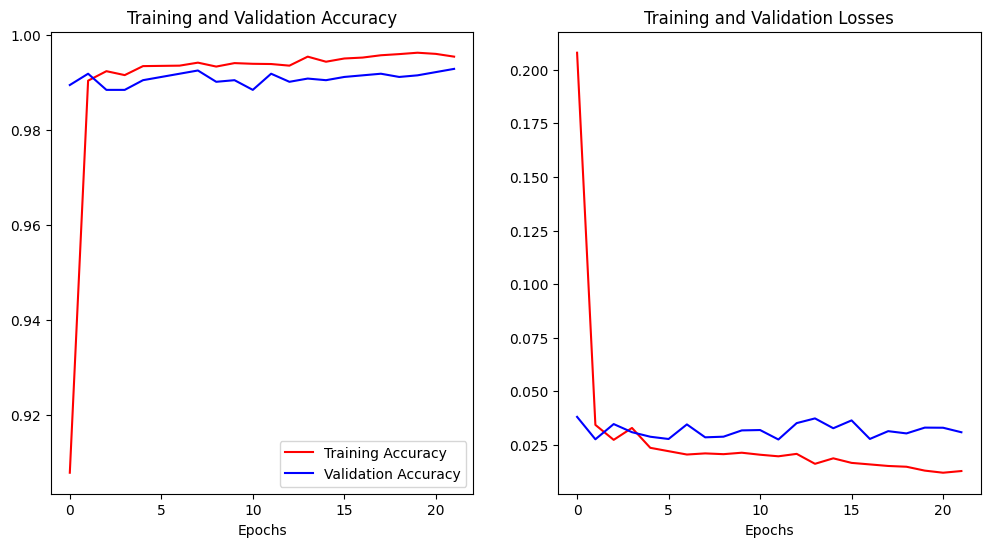

82/82 [==============================] - 0s 1ms/step
Training Classification Report: 
               precision    recall  f1-score   support

         0.0      0.996     0.995     0.996     10260
         1.0      0.995     0.996     0.996     10341

    accuracy                          0.996     20601
   macro avg      0.996     0.996     0.996     20601
weighted avg      0.996     0.996     0.996     20601


Validation Classification Report: 
               precision    recall  f1-score   support

         0.0      0.993     0.990     0.992      1466
         1.0      0.991     0.993     0.992      1477

    accuracy                          0.992      2943
   macro avg      0.992     0.992     0.992      2943
weighted avg      0.992     0.992     0.992      2943


Testing Classification Report: 
               precision    recall  f1-score   support

         0.0      0.994     0.992     0.993      1303
         1.0      0.992     0.994     0.993      1314

    accuracy            

In [13]:
cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu', input_shape = x_train[0].shape),
    tf.keras.layers.MaxPool2D((3,3), padding = 'same'),

    tf.keras.layers.UpSampling2D((4,4)),

    tf.keras.layers.Conv2D(32, (3,3), padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPool2D((3,3), padding = 'same'),

    tf.keras.layers.Conv2D(32, (2,2), padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPool2D((2,2), padding = 'same'),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation = 'sigmoid')
])

cnn.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.003),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

history = cnn.fit(
            x_train, y_train, batch_size = 256,
            epochs = 50,
            validation_data = [x_val, y_val],
            validation_batch_size = 256,
            callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10),
                         tf.keras.callbacks.ModelCheckpoint(str = 'val_loss', save_best_only = True, save_weights_only = True, filepath= "CNN_No_Aug_HSV")]
        )


cnn.load_weights('CNN_No_Aug_HSV')
fig, ax = plot_history(history)

fig.savefig(PLOT_SAVE + "CNN_unaug_losscurve_HSV.png", facecolor = 'white')
preds_train = np.argmax(cnn.predict(x_train), axis = 1)
preds_val   = np.argmax(cnn.predict(x_val), axis = 1)
preds_test  = np.argmax(cnn.predict(x_test), axis = 1)

print("Training Classification Report: \n", classification_report(y_train, preds_train, digits = N_DIGITS))
print("\nValidation Classification Report: \n", classification_report(y_val, preds_val, digits = N_DIGITS))
print("\nTesting Classification Report: \n", classification_report(y_test, preds_test, digits = N_DIGITS))

### Augmented Dataset

#### Naive Bayes

In [14]:
from sklearn import naive_bayes

nb_cls = naive_bayes.GaussianNB()
nb_cls.fit(x_train_aug.reshape(n_aug_train, -1), y_train_aug)
preds_train = nb_cls.predict(x_train_aug.reshape(n_aug_train, -1))
preds_val   = nb_cls.predict(x_val.reshape(n_val, -1))
preds_test  = nb_cls.predict(x_test.reshape(n_test, -1))

print("Training Classification Report: \n", classification_report(y_train_aug, preds_train, digits = N_DIGITS))
print("\nValidation Classification Report: \n", classification_report(y_val, preds_val, digits = N_DIGITS))
print("\nTesting Classification Report: \n", classification_report(y_test, preds_test, digits = N_DIGITS))

Training Classification Report: 
               precision    recall  f1-score   support

         0.0      0.607     0.612     0.609     20520
         1.0      0.612     0.607     0.609     20682

    accuracy                          0.609     41202
   macro avg      0.609     0.609     0.609     41202
weighted avg      0.609     0.609     0.609     41202


Validation Classification Report: 
               precision    recall  f1-score   support

         0.0      0.610     0.493     0.545      1466
         1.0      0.577     0.687     0.627      1477

    accuracy                          0.590      2943
   macro avg      0.593     0.590     0.586      2943
weighted avg      0.593     0.590     0.586      2943


Testing Classification Report: 
               precision    recall  f1-score   support

         0.0      0.653     0.495     0.563      1303
         1.0      0.596     0.739     0.660      1314

    accuracy                          0.618      2617
   macro avg      0.624

#### Logistic Regression

Epoch 1/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.4968 - val_loss: 0.6917 - val_accuracy: 0.4910
Epoch 2/100
81/81 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.4986 - val_loss: 0.6852 - val_accuracy: 0.4937
Epoch 3/100
81/81 [==============================] - 0s 2ms/step - loss: 0.6855 - accuracy: 0.5055 - val_loss: 0.6825 - val_accuracy: 0.4975
Epoch 4/100
81/81 [==============================] - 0s 2ms/step - loss: 0.6822 - accuracy: 0.5168 - val_loss: 0.6801 - val_accuracy: 0.5158
Epoch 5/100
81/81 [==============================] - 0s 2ms/step - loss: 0.6792 - accuracy: 0.5251 - val_loss: 0.6773 - val_accuracy: 0.5304
Epoch 6/100
81/81 [==============================] - 0s 2ms/step - loss: 0.6763 - accuracy: 0.5403 - val_loss: 0.6743 - val_accuracy: 0.5375
Epoch 7/100
81/81 [==============================] - 0s 3ms/step - loss: 0.6736 - accuracy: 0.5521 - val_loss: 0.6727 - val_accuracy: 0.5627
Epoch 8/100
8

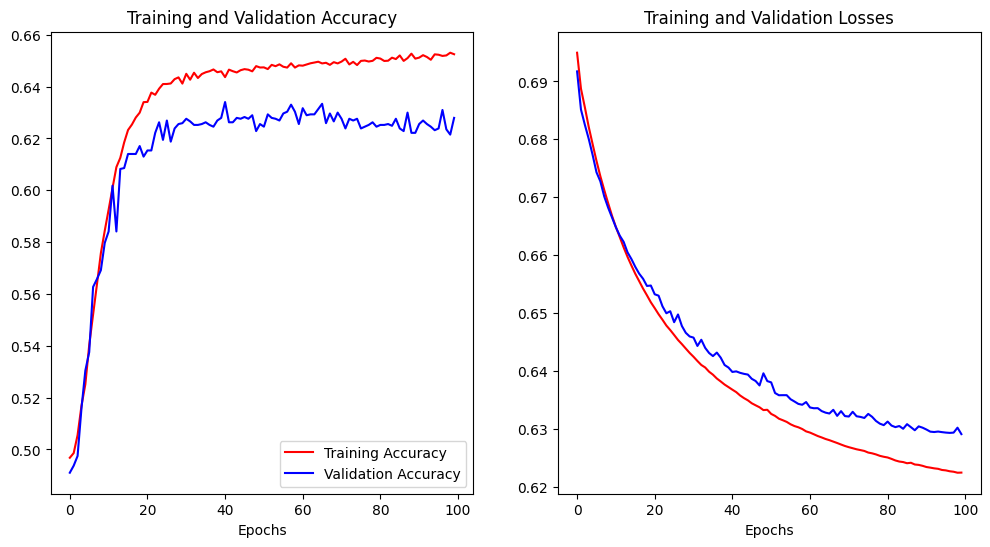

Training Classification Report: 
               precision    recall  f1-score   support

         0.0      0.653     0.654     0.654     20520
         1.0      0.656     0.656     0.656     20682

    accuracy                          0.655     41202
   macro avg      0.655     0.655     0.655     41202
weighted avg      0.655     0.655     0.655     41202


Validation Classification Report: 
               precision    recall  f1-score   support

         0.0      0.639     0.583     0.610      1466
         1.0      0.619     0.672     0.645      1477

    accuracy                          0.628      2943
   macro avg      0.629     0.628     0.627      2943
weighted avg      0.629     0.628     0.627      2943


Testing Classification Report: 
               precision    recall  f1-score   support

         0.0      0.641     0.560     0.598      1303
         1.0      0.613     0.689     0.649      1314

    accuracy                          0.625      2617
   macro avg      0.627

In [15]:
from sklearn.linear_model import LogisticRegression

logreg_cls =  tf.keras.Sequential([tf.keras.layers.Dense(2, activation = 'sigmoid', input_dim = HEIGHT * WIDTH)])
logreg_cls.compile(optimizer = tf.optimizers.Adam(0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = logreg_cls.fit(x_train_aug.reshape(n_aug_train, -1), 
                        y_train_aug,
                        batch_size = 512,
                        validation_data=[x_val.reshape(n_val, -1), y_val],
                        validation_batch_size=128,
                        epochs = 100,
                        callbacks =  [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10),
                                    tf.keras.callbacks.ModelCheckpoint(str = 'val_loss', save_best_only = True, save_weights_only = True, filepath= "LR_Aug_HSV")])
preds_train = np.argmax(logreg_cls.predict(x_train_aug.reshape(n_aug_train, -1)), axis = 1)
preds_val   = np.argmax(logreg_cls.predict(x_val.reshape(n_val, -1)), axis = 1)
preds_test  = np.argmax(logreg_cls.predict(x_test.reshape(n_test, -1)), axis = 1)

logreg_cls.load_weights('LR_Aug_HSV')
fig, ax = plot_history(history)

fig.savefig(PLOT_SAVE + "logreg_aug_losscurve_HSV.png", facecolor = 'white')

print("Training Classification Report: \n", classification_report(y_train_aug, preds_train, digits = N_DIGITS))
print("\nValidation Classification Report: \n", classification_report(y_val, preds_val, digits = N_DIGITS))
print("\nTesting Classification Report: \n", classification_report(y_test, preds_test, digits = N_DIGITS))

#### Decision Trees

In [16]:
from sklearn.tree import DecisionTreeClassifier

dt_cls =  DecisionTreeClassifier(criterion = 'gini', splitter = 'best', max_depth = 25, min_samples_split = 2, )
dt_cls.fit(x_train_aug.reshape(n_aug_train, -1), y_train_aug)
preds_train = dt_cls.predict(x_train_aug.reshape(n_aug_train, -1))
preds_val   = dt_cls.predict(x_val.reshape(n_val, -1))
preds_test  = dt_cls.predict(x_test.reshape(n_test, -1))

print("Training Classification Report: \n", classification_report(y_train_aug, preds_train, digits = N_DIGITS))
print("\nValidation Classification Report: \n", classification_report(y_val, preds_val, digits = N_DIGITS))
print("\nTesting Classification Report: \n", classification_report(y_test, preds_test, digits = N_DIGITS))

Training Classification Report: 
               precision    recall  f1-score   support

         0.0      0.799     0.998     0.887     20520
         1.0      0.997     0.751     0.856     20682

    accuracy                          0.874     41202
   macro avg      0.898     0.874     0.872     41202
weighted avg      0.898     0.874     0.872     41202


Validation Classification Report: 
               precision    recall  f1-score   support

         0.0      0.709     0.947     0.811      1466
         1.0      0.921     0.614     0.737      1477

    accuracy                          0.780      2943
   macro avg      0.815     0.780     0.774      2943
weighted avg      0.815     0.780     0.774      2943


Testing Classification Report: 
               precision    recall  f1-score   support

         0.0      0.719     0.944     0.816      1303
         1.0      0.920     0.635     0.751      1314

    accuracy                          0.789      2617
   macro avg      0.819

#### XGBoost

In [13]:
tf.keras.backend.clear_session()

from xgboost import XGBClassifier

xgb_cls = XGBClassifier(max_depth = 10, objective = 'reg:logistic',
                            num_parallel_tree = 20, booster = 'gbtree',
                            gamma = 0.5, tree_method = 'gpu_hist', subsample = 0.4, reg_lambda = 1)
xgb_cls.fit(x_train_aug.reshape(n_aug_train, -1), y_train_aug)
preds_train = xgb_cls.predict(x_train_aug.reshape(n_aug_train, -1))
preds_val   = xgb_cls.predict(x_val.reshape(n_val, -1))
preds_test  = xgb_cls.predict(x_test.reshape(n_test, -1))

print("Training Classification Report: \n", classification_report(y_train_aug, preds_train, digits = N_DIGITS))
print("\nValidation Classification Report: \n", classification_report(y_val, preds_val, digits = N_DIGITS))
print("\nTesting Classification Report: \n", classification_report(y_test, preds_test, digits = N_DIGITS))
                  

Training Classification Report: 
               precision    recall  f1-score   support

         0.0      0.986     0.999     0.993     20520
         1.0      0.999     0.986     0.992     20682

    accuracy                          0.993     41202
   macro avg      0.993     0.993     0.993     41202
weighted avg      0.993     0.993     0.993     41202


Validation Classification Report: 
               precision    recall  f1-score   support

         0.0      0.899     0.951     0.924      1466
         1.0      0.948     0.894     0.921      1477

    accuracy                          0.923      2943
   macro avg      0.924     0.923     0.922      2943
weighted avg      0.924     0.923     0.922      2943


Testing Classification Report: 
               precision    recall  f1-score   support

         0.0      0.909     0.954     0.931      1303
         1.0      0.952     0.906     0.928      1314

    accuracy                          0.930      2617
   macro avg      0.931

#### SVM

In [14]:
from sklearn.svm import SVC

svm_cls = SVC(kernel = 'rbf', max_iter = 250, verbose= True)
svm_cls.fit(x_train_aug.reshape(n_aug_train, -1), y_train_aug)
preds_train = svm_cls.predict(x_train_aug.reshape(n_aug_train, -1))
preds_val   = svm_cls.predict(x_val.reshape(n_val, -1))
preds_test  = svm_cls.predict(x_test.reshape(n_test, -1))

print("Training Classification Report: \n", classification_report(y_train_aug, preds_train, digits = N_DIGITS))
print("\nValidation Classification Report: \n", classification_report(y_val, preds_val, digits = N_DIGITS))
print("\nTesting Classification Report: \n", classification_report(y_test, preds_test, digits = N_DIGITS))
                  

[LibSVM]

c:\ProgramData\Anaconda3\envs\ml\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Training Classification Report: 
               precision    recall  f1-score   support

         0.0      0.437     0.618     0.512     20520
         1.0      0.357     0.211     0.265     20682

    accuracy                          0.413     41202
   macro avg      0.397     0.414     0.388     41202
weighted avg      0.397     0.413     0.388     41202


Validation Classification Report: 
               precision    recall  f1-score   support

         0.0      0.432     0.596     0.501      1466
         1.0      0.357     0.222     0.274      1477

    accuracy                          0.408      2943
   macro avg      0.394     0.409     0.387      2943
weighted avg      0.394     0.408     0.387      2943


Testing Classification Report: 
               precision    recall  f1-score   support

         0.0      0.423     0.601     0.497      1303
         1.0      0.323     0.189     0.238      1314

    accuracy                          0.394      2617
   macro avg      0.373

#### CNN Model

Epoch 1/100
81/81 [==============================] - 5s 28ms/step - loss: 0.3102 - accuracy: 0.8585 - val_loss: 0.0527 - val_accuracy: 0.9830
Epoch 2/100
81/81 [==============================] - 2s 22ms/step - loss: 0.0798 - accuracy: 0.9740 - val_loss: 0.0355 - val_accuracy: 0.9901
Epoch 3/100
81/81 [==============================] - 2s 21ms/step - loss: 0.0479 - accuracy: 0.9852 - val_loss: 0.0367 - val_accuracy: 0.9891
Epoch 4/100
81/81 [==============================] - 2s 21ms/step - loss: 0.0421 - accuracy: 0.9870 - val_loss: 0.0364 - val_accuracy: 0.9891
Epoch 5/100
81/81 [==============================] - 2s 22ms/step - loss: 0.0374 - accuracy: 0.9888 - val_loss: 0.0265 - val_accuracy: 0.9925
Epoch 6/100
81/81 [==============================] - 2s 22ms/step - loss: 0.0363 - accuracy: 0.9888 - val_loss: 0.0269 - val_accuracy: 0.9922
Epoch 7/100
81/81 [==============================] - 2s 21ms/step - loss: 0.0325 - accuracy: 0.9907 - val_loss: 0.0259 - val_accuracy: 0.9908
Epoch 

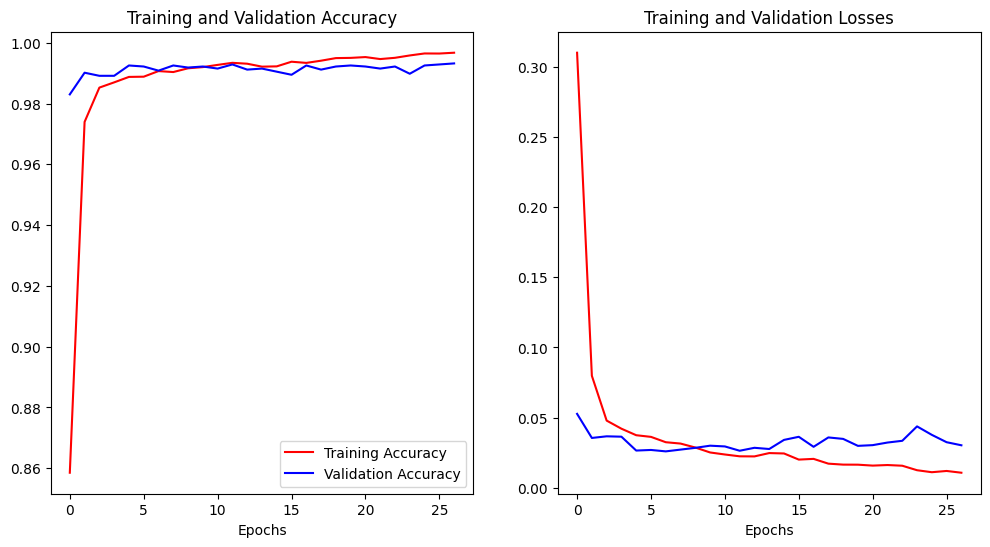

82/82 [==============================] - 0s 2ms/step
Training Classification Report: 
               precision    recall  f1-score   support

         0.0      0.986     0.994     0.990     20520
         1.0      0.994     0.986     0.990     20682

    accuracy                          0.990     41202
   macro avg      0.990     0.990     0.990     41202
weighted avg      0.990     0.990     0.990     41202


Validation Classification Report: 
               precision    recall  f1-score   support

         0.0      0.996     0.986     0.991      1466
         1.0      0.986     0.996     0.991      1477

    accuracy                          0.991      2943
   macro avg      0.991     0.991     0.991      2943
weighted avg      0.991     0.991     0.991      2943


Testing Classification Report: 
               precision    recall  f1-score   support

         0.0      0.996     0.992     0.994      1303
         1.0      0.992     0.996     0.994      1314

    accuracy            

In [15]:
cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), padding = 'same', activation = 'relu', input_shape = x_train[0].shape),
    tf.keras.layers.MaxPool2D((3,3), padding = 'same'),

    tf.keras.layers.UpSampling2D((4,4)),

    tf.keras.layers.Conv2D(32, (3,3), padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPool2D((3,3), padding = 'same'),

    tf.keras.layers.Conv2D(32, (2,2), padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPool2D((2,2), padding = 'same'),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation = 'sigmoid')
])

cnn.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

history = cnn.fit(
            x_train_aug, y_train_aug, batch_size = 512,
            epochs = 100,
            shuffle = True,
            validation_data = [x_val, y_val],
            validation_batch_size = 256,
            callbacks = [
                tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 20),
                tf.keras.callbacks.ModelCheckpoint(str = 'val_loss', save_best_only = True, save_weights_only = True, filepath= "CNN_Aug_HSV")
            ]
        )

fig, ax = plot_history(history)

cnn.load_weights('CNN_Aug_HSV')

fig.savefig(PLOT_SAVE + "CNN_aug_losscurve_HSV.png", facecolor = 'white')
preds_train = np.argmax(cnn.predict(x_train_aug), axis = 1)
preds_val   = np.argmax(cnn.predict(x_val), axis = 1)
preds_test  = np.argmax(cnn.predict(x_test), axis = 1)

print("Training Classification Report: \n", classification_report(y_train_aug, preds_train, digits = N_DIGITS))
print("\nValidation Classification Report: \n", classification_report(y_val, preds_val, digits = N_DIGITS))
print("\nTesting Classification Report: \n", classification_report(y_test, preds_test, digits = N_DIGITS))